In [ ]:
!pip install noisereduce
from scipy.io import wavfile
import noisereduce as nr
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving s1.wav to s1 (1).wav


In [ ]:
data,sr=librosa.load('s1.wav')
noise_level = 0.01
gaussian_noise = np.random.normal(0, noise_level, data.shape)
noisy_audio = data + gaussian_noise

In [ ]:
from IPython.display import Audio
print("Original Audio:")
Audio(data, rate=sr)

Original Audio:


In [ ]:
print("Noisy Audio:")
Audio(noisy_audio, rate=sr)

Noisy Audio:


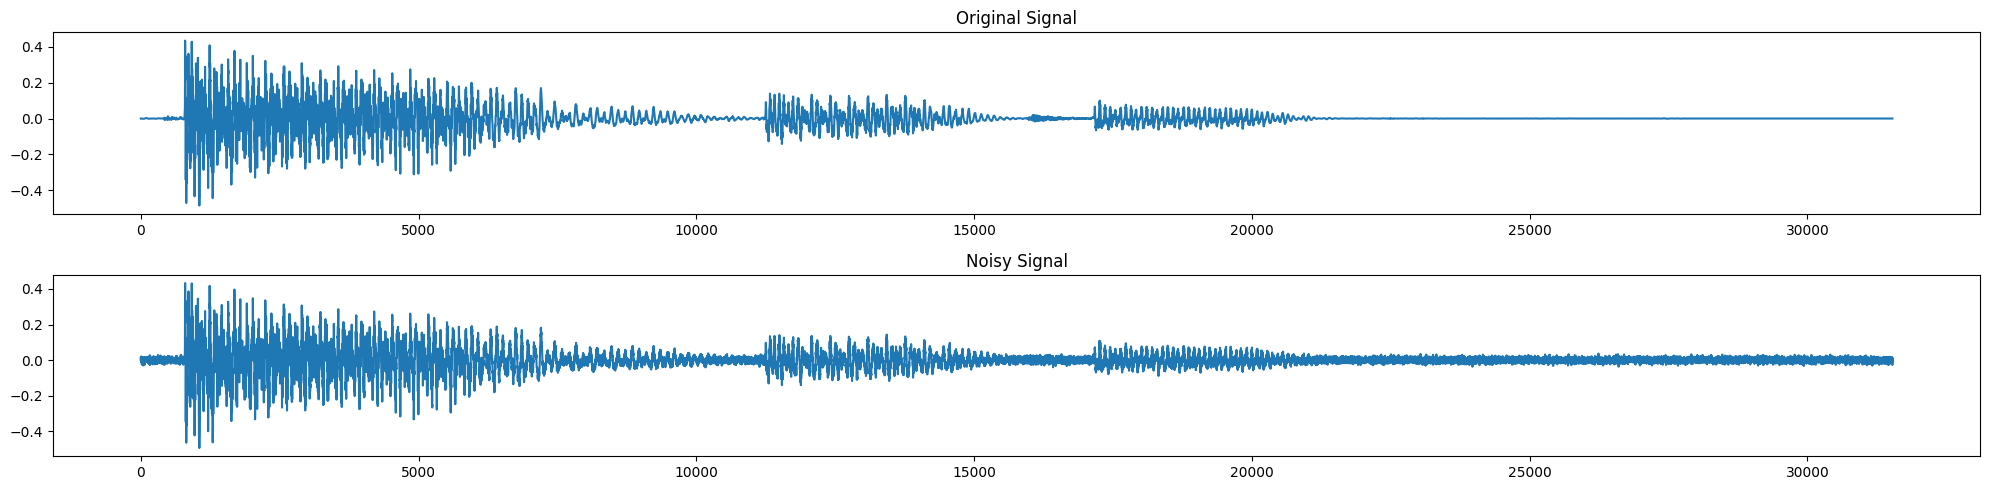

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(data,label='Original Signal')
plt.title('Original Signal')

plt.subplot(2,1,2)
plt.plot(noisy_audio,label='Noisy Signal')
plt.title('Noisy Signal')
plt.tight_layout()

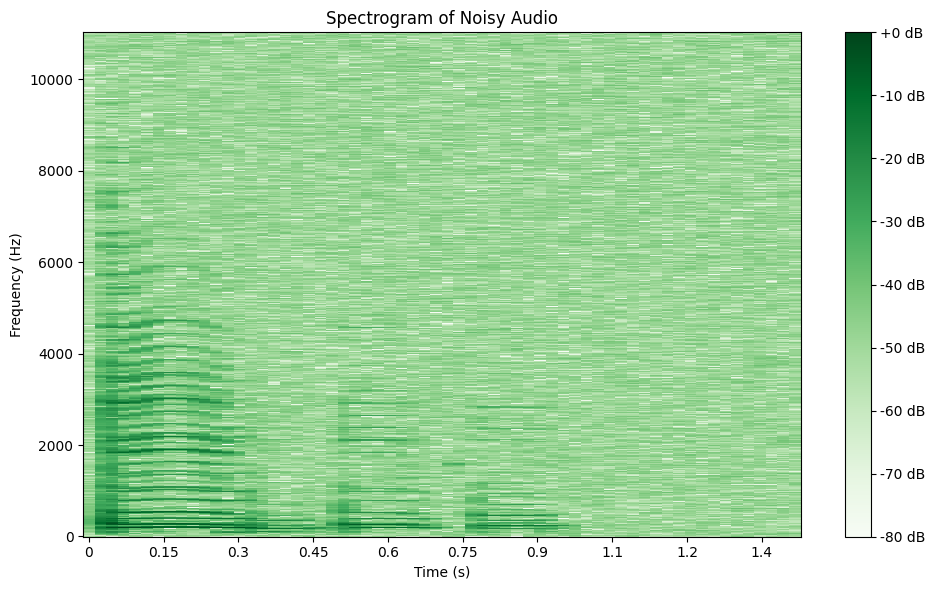

In [ ]:
import librosa.display

D = librosa.stft(noisy_audio)

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='Greens')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Noisy Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

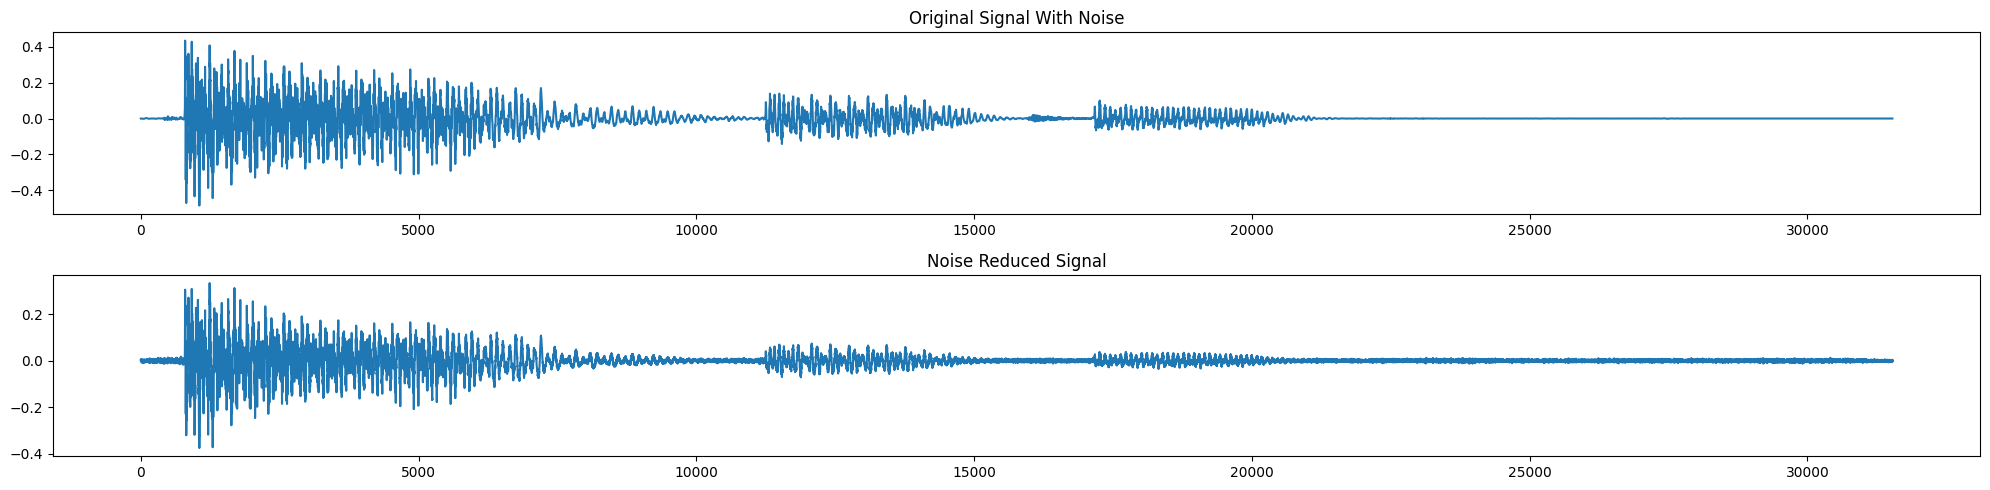

In [ ]:
cleansed_audio = nr.reduce_noise(y=noisy_audio, sr=sr)

plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(data)
plt.title('Original Signal With Noise')

plt.subplot(2,1,2)
plt.plot(cleansed_audio)
plt.title('Noise Reduced Signal')
plt.tight_layout()

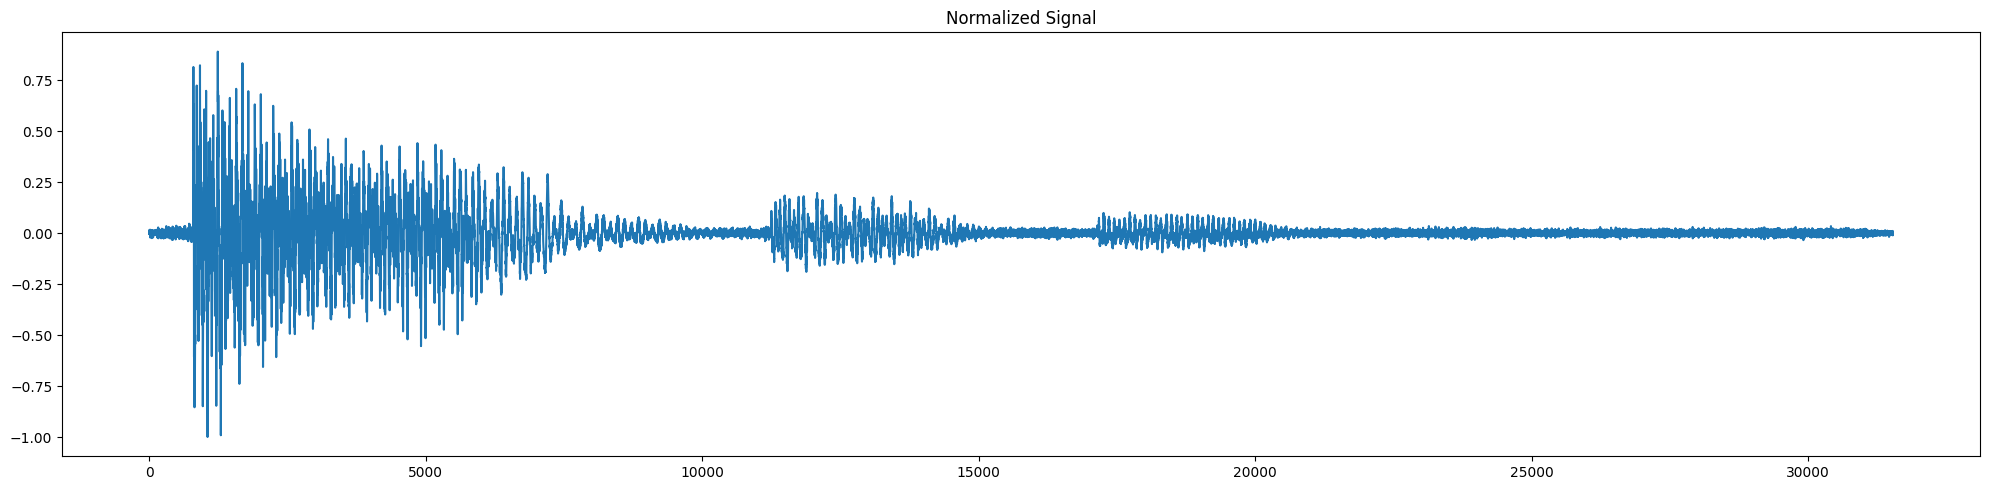

In [ ]:
normalized_audio = cleansed_audio/ np.max(np.abs(cleansed_audio))

plt.figure(figsize=(20,5))
plt.plot(normalized_audio)
plt.title('Normalized Signal')
plt.tight_layout()

MFCC step by step

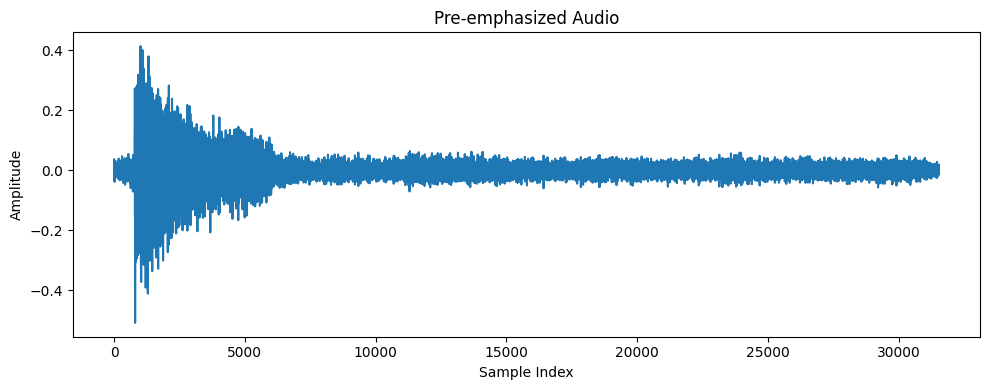

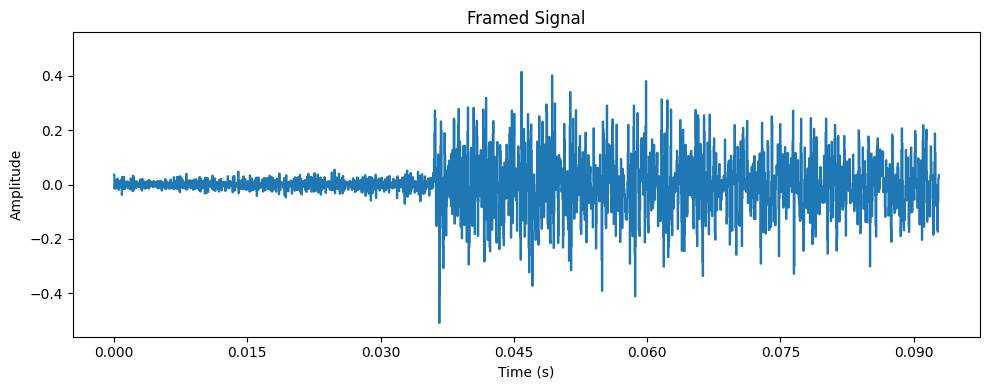

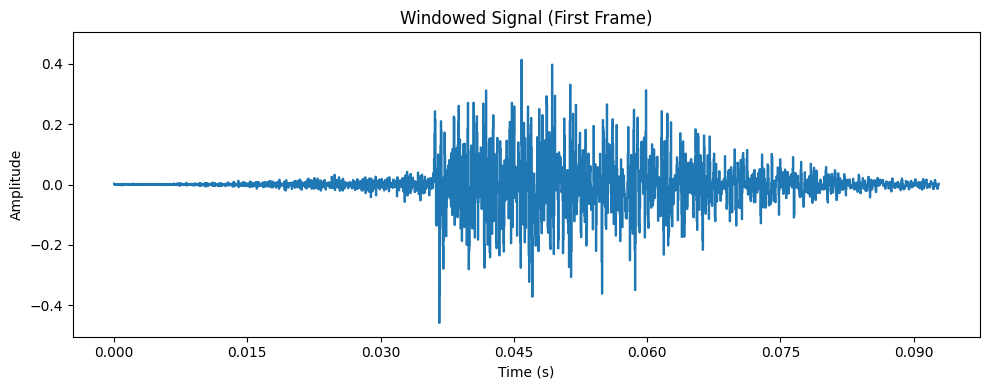

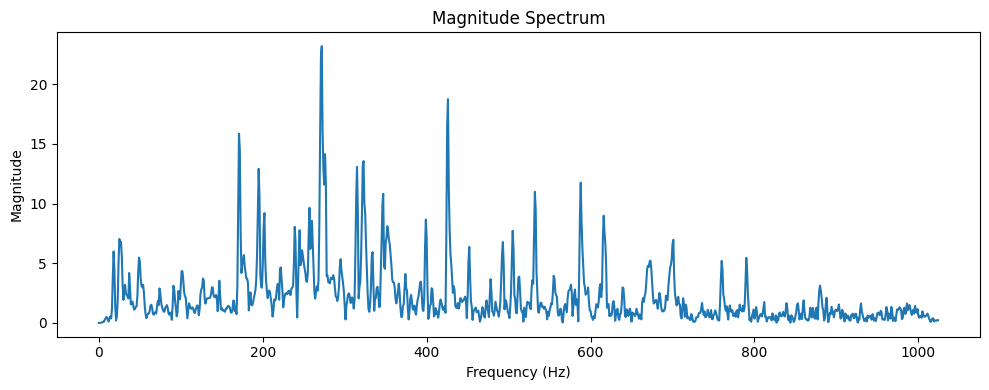

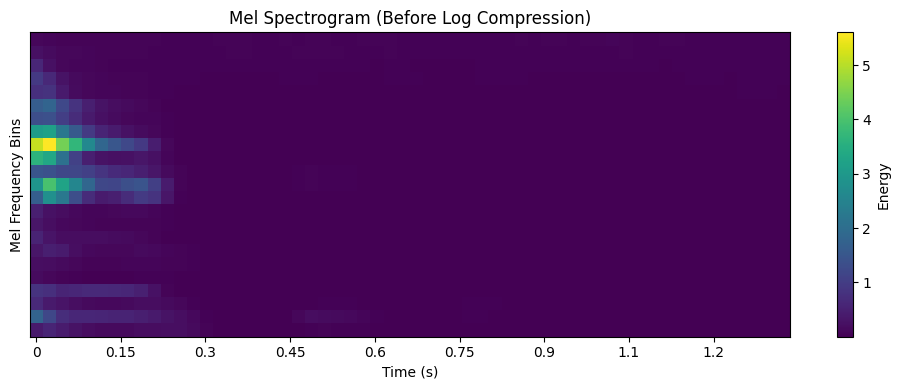

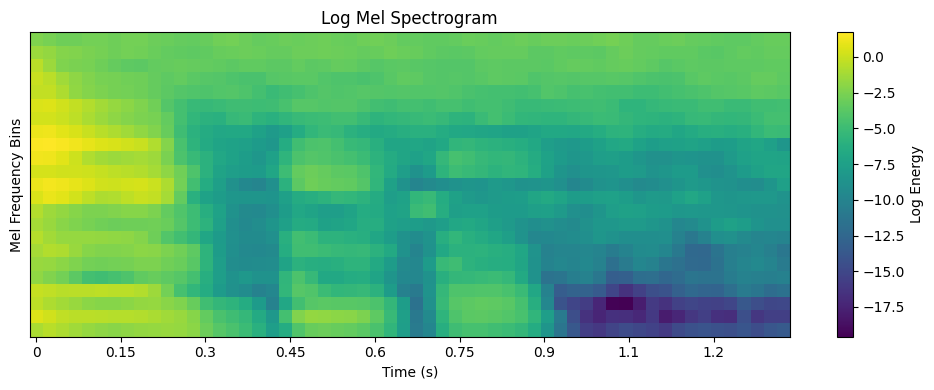

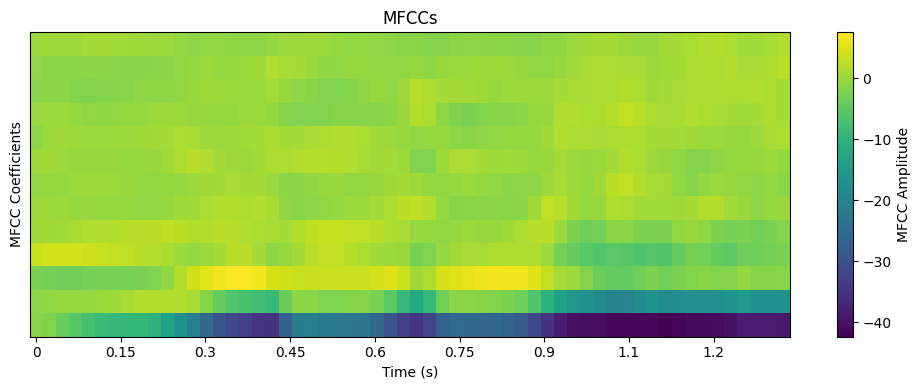

In [ ]:
from scipy.fftpack import dct

# 1. Pre-emphasis using librosa (this applies the pre-emphasis filter)
pre_emphasized_audio = librosa.effects.preemphasis(normalized_audio, coef=0.97)

# Plot pre-emphasized audio
plt.figure(figsize=(10, 4))
plt.plot(pre_emphasized_audio)
plt.title('Pre-emphasized Audio')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 2. Framing
frame_size = 2048
hop_size = 512
frames = librosa.util.frame(pre_emphasized_audio, frame_length=frame_size, hop_length=hop_size)

# Plot framed signal (showing the first frame)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(frames[:, 0], sr=sr)
plt.title('Framed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 3. Windowing (using a Hamming window)
window = np.hamming(frame_size)
windowed_frames = frames * window[:, None]

# Plot windowed signal (showing the first frame after windowing)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(windowed_frames[:, 0], sr=sr)
plt.title('Windowed Signal (First Frame)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 4. FFT (Fast Fourier Transform)
fft_frames = np.fft.rfft(windowed_frames, axis=0)

# Plot the magnitude spectrum of the first frame
plt.figure(figsize=(10, 4))
plt.plot(np.abs(fft_frames[:, 0]))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# 5. Mel Filterbank (using librosa's mel filterbank)
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=frame_size, n_mels=23, fmin=0, fmax=sr//2)
mel_spectrum = np.dot(mel_filterbank, np.abs(fft_frames)**2)

# Plot Mel Spectrogram (before logarithmic compression)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrum, x_axis='time', sr=sr, hop_length=hop_size, cmap='viridis')
plt.colorbar(label='Energy')
plt.title('Mel Spectrogram (Before Log Compression)')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency Bins')
plt.tight_layout()
plt.show()

# 6. Logarithmic compression
log_mel_spectrum = np.log(mel_spectrum + np.finfo(float).eps)

# Plot Log Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrum, x_axis='time', sr=sr, hop_length=hop_size, cmap='viridis')
plt.colorbar(label='Log Energy')
plt.title('Log Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency Bins')
plt.tight_layout()
plt.show()

# 7. DCT (Discrete Cosine Transform)
mfcc = dct(log_mel_spectrum, type=2, axis=0, norm='ortho')

# We typically use the first 13 coefficients
mfccs = mfcc[:13, :]

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=hop_size, cmap='viridis')
plt.colorbar(label='MFCC Amplitude')
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

MFCCs using Librosa


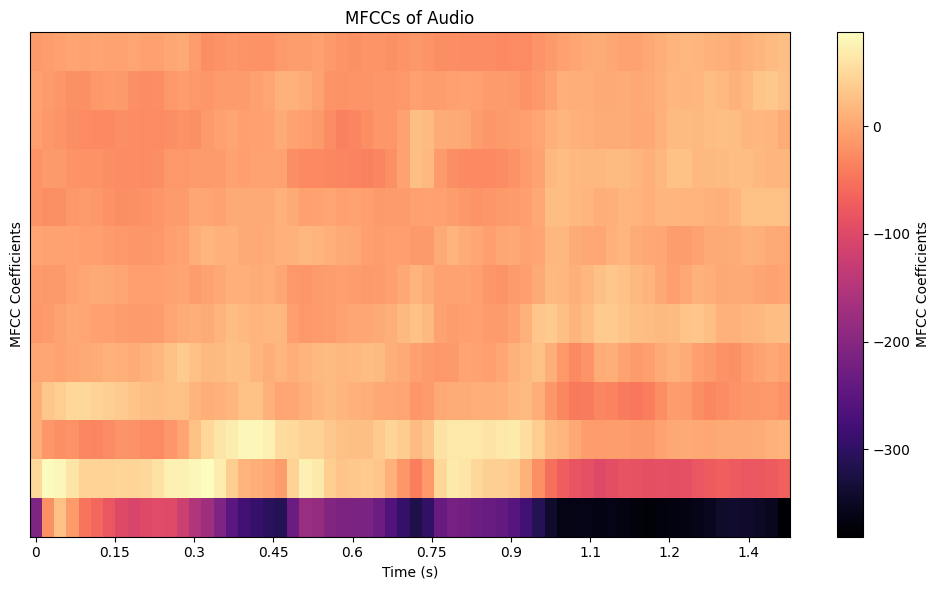

In [ ]:
mfccs = librosa.feature.mfcc(y=normalized_audio, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='magma')
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCCs of Audio')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


The MFCCs from the step-by-step approach provide a transparent understanding of the extraction process but lack some refinements. In contrast, librosa’s direct method applies automated optimizations, producing more polished features. While the step-by-step method aids learning, librosa’s output is better suited for practical applications requiring efficiency and feature-rich representations.